<a href="https://colab.research.google.com/github/gitmattalves/analise_taxa_selic/blob/main/AnaliseTaxaSelic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Análise da Taxa Selic

Projeto de análise descritiva com o objetivo de colocar em prática o aprendizado durante o curso de **Ciências de Dados** da Modal e Tranding com Dados. 

- Foi realizada uma análise da variação da taxa Selic aplicando um filtro para os três últimos Governos.
O projeto não visa analisar a política econômica adotada pelos Governos, pois, para isso seria necessário um estudo mais aprofundado dos conceitos macroeconômicos.

Foi realizado o download dos dado utilizando a API da Quandl(Nasdaq), que trata-se de uma API muito utilizada dentro do mercado financeiro, utilizada por centenas de empresas para obtenção de dados macroeconômicos.

**Obs:** A biblioteca quandl foi descontinuada e substituída pela *Nasdaq-data-link*. Na data de realização do estudo, ainda foi utilizada a quandl.


## 1.1 Instalação e importação das bibliotecas necessárias 

Neste etapa foi realizada a instação e das bibliotecas necessária para a realização do estudo.
Para manipulação de dados, pandas e numpay, para visualização de dados, matplotlib e para importação de dados foi utilizada a biblioteca quandl.



In [ ]:
# Instalando os bibliotecas necessárias

!pip install pandas numpay
!pip install datetime
!pip install matplotlib
!pip install quandl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement numpay (from versions: none)
ERROR: No matching distribution found for numpay
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# importsanto as bibliotecas 

# Manipulação de dados
import pandas as pd
import numpy as np

# Visualização de dados
import matplotlib.pyplot as plt

# Importação dos dados financeiros
import quandl

In [ ]:
# Inserindo a chave de API

quandl.ApiConfig.api_key = 'Chave API'

## 1.2 Extração dos dados via API

Foi realizada a extração dos dados desde anos 2000 até a data de estudo.

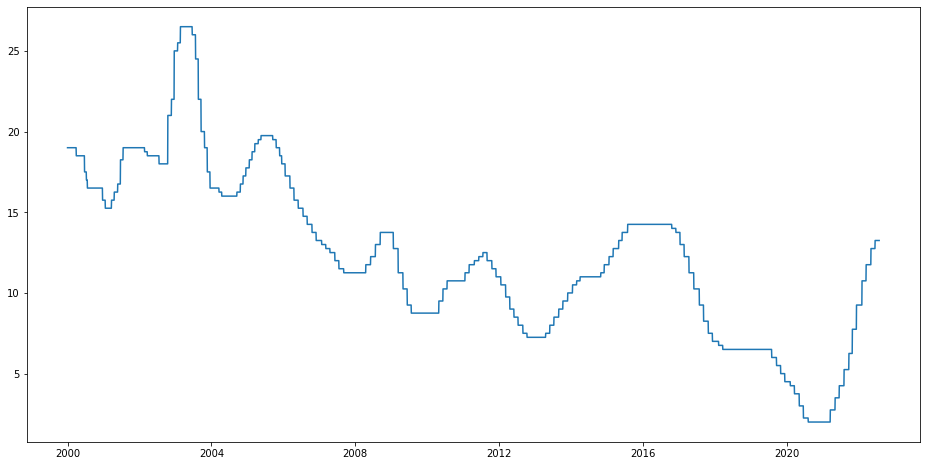

In [ ]:
# Extraindo e verificando os dados da selic

selic = quandl.get('BCB/432', start_date = '2000-01-01', end_date = '2022-07-28')

plt.figure(figsize = (16,8))
plt.plot(selic)
plt.show()

In [ ]:
# Verificando o tipo de dados
type(selic)

pandas.core.frame.DataFrame

## 1.3 Governo Bolsonaro

Analisando o período do atual Governo, que compreende o período de 01 de janeiro de 2019,até a data do estudo.

Para essa extração foi utilizado o método loc, que nos possibilita executar o filtro por datas específicas.

In [ ]:
# Filtro da Selic para o período governvo atual, Bolsonaro
selic_B = selic.loc['2019-01-01' : ]
selic_B

,Value
Date,
2019-01-01,6.50
2019-01-02,6.50
2019-01-03,6.50
2019-01-04,6.50
2019-01-05,6.50
...,...
2022-07-24,13.25
2022-07-25,13.25
2022-07-26,13.25


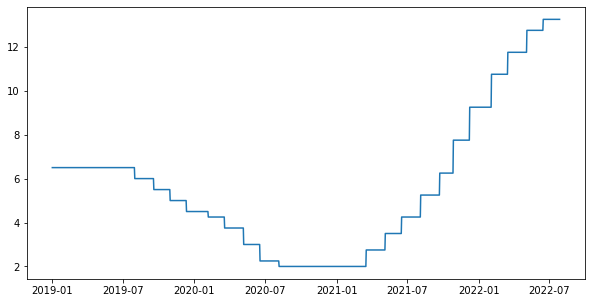

In [ ]:
# Plotando a taxa selic

plt.figure(figsize=(10,5))
plt.plot(selic_B)
plt.show()

## 1.5 Governo Dilma/Temer
Agora aplicando o filtro para o período que compreende o segundo mandato da presidente Dilma e posteriomente ao seu impeachment o governo Temer, de 01 de janeiro de 2015 à 31 de dezembro de 2018.



In [ ]:
selic_D_T = selic.loc['2015-01-01' : '2018-12-31']
selic_D_T

,Value
Date,
2015-01-01,11.75
2015-01-02,11.75
2015-01-03,11.75
2015-01-04,11.75
2015-01-05,11.75
...,...
2018-12-27,6.50
2018-12-28,6.50
2018-12-29,6.50


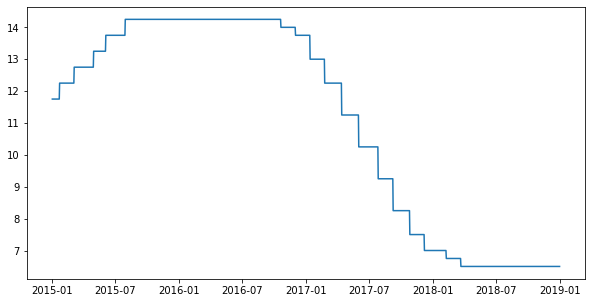

In [ ]:
# Plotando a taxa durante o período

plt.figure(figsize=(10,5))
plt.plot(selic_D_T)
plt.show()

## 1.6 Governo Dilma

Filtro para o primeiro mandato da presidente Dilma, que compreende o período de 01 de janeiro de 2010 até 31 de dezembro de 2014.

In [ ]:
selic_D = selic.loc['2011-01-01' : '2014-12-31']
selic_D 

,Value
Date,
2011-01-01,10.75
2011-01-02,10.75
2011-01-03,10.75
2011-01-04,10.75
2011-01-05,10.75
...,...
2014-12-27,11.75
2014-12-28,11.75
2014-12-29,11.75


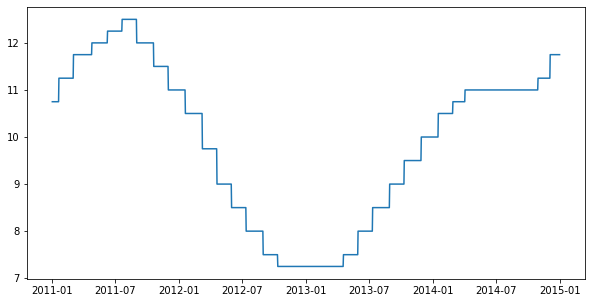

In [ ]:
# Plotando o período especificado

plt.figure(figsize=(10,5))
plt.plot(selic_D)
plt.show()

# 2. Junção os datraframes de cada período

Como havia feito o recorte dos dados para os períodos especificados, foi relizada a junção dos dados utilizando a função merge do pandas.



## 2.1 Junção dos dataframes

- Primeiro foi realizada a junção dos dois últimos mandatos (2014-2018 e 2019 até o momento).
- Foi utilizado a função outer join pois são períodos diferentes, não possuindo períodos de interseção entre eles.

In [ ]:
# Unindo dois dataframe
analise_DT_B = pd.merge(selic_D_T, selic_B, how = 'outer', on = 'Date' )
analise_DT_B


,Value_x,Value_y
Date,,
2015-01-01,11.75,NaN
2015-01-02,11.75,NaN
2015-01-03,11.75,NaN
2015-01-04,11.75,NaN
2015-01-05,11.75,NaN
...,...,...
2022-07-24,NaN,13.25
2022-07-25,NaN,13.25
2022-07-26,NaN,13.25


- No segundo momento, foi realizada a junção do dataframe gerado na primeira união com o primeiro período analisado(governo Dilma), complementando assim o período total analisado.

In [ ]:
# Fazsendo a junção e plotando
analise_completa = pd.merge(selic_D, analise_DT_B, how='outer', on = 'Date')
analise_completa


,Value,Value_x,Value_y
Date,,,
2011-01-01,10.75,NaN,NaN
2011-01-02,10.75,NaN,NaN
2011-01-03,10.75,NaN,NaN
2011-01-04,10.75,NaN,NaN
2011-01-05,10.75,NaN,NaN
...,...,...,...
2022-07-24,NaN,NaN,13.25
2022-07-25,NaN,NaN,13.25
2022-07-26,NaN,NaN,13.25


## 2.2 Tratamento dos Dados

Neste etapa foi realizada uma verificação dos dados e a realização de alguns tratamentos para um melhor entendimento e visualição.

In [ ]:
# Verificando as estrutura gerada

analise_completa.head

<bound method NDFrame.head of             Value  Value_x  Value_y
Date                               
2011-01-01  10.75      NaN      NaN
2011-01-02  10.75      NaN      NaN
2011-01-03  10.75      NaN      NaN
2011-01-04  10.75      NaN      NaN
2011-01-05  10.75      NaN      NaN
...           ...      ...      ...
2022-07-24    NaN      NaN    13.25
2022-07-25    NaN      NaN    13.25
2022-07-26    NaN      NaN    13.25
2022-07-27    NaN      NaN    13.25
2022-07-28    NaN      NaN    13.25

[4227 rows x 3 columns]>

- Não foi realizado o tratamento dos NaNs pois realmente iriam ficar vazios mesmo, uma vez que havia recortado as datas.

In [ ]:
# Verificando as colunas geradas

analise_completa.columns

Index(['Value', 'Value_x', 'Value_y'], dtype='object')

- Renomeando as colunas para facilitar a visualização e entendimento dos dados

In [ ]:
# Renomeando as colunas

analise_completa = analise_completa.rename({'Value':  'Governo Dilma',
                                            'Value_x': 'Governo Dilma/Temer',
                                            'Value_y': 'Governo Bolsonaro'}, axis=1)
analise_completa

,Governo Dilma,Governo Dilma/Temer,Governo Bolsonaro
Date,,,
2011-01-01,10.75,NaN,NaN
2011-01-02,10.75,NaN,NaN
2011-01-03,10.75,NaN,NaN
2011-01-04,10.75,NaN,NaN
2011-01-05,10.75,NaN,NaN
...,...,...,...
2022-07-24,NaN,NaN,13.25
2022-07-25,NaN,NaN,13.25
2022-07-26,NaN,NaN,13.25


In [ ]:
# Verificando os últimos registros

analise_completa.tail()

,Governo Dilma,Governo Dilma/Temer,Governo Bolsonaro
Date,,,
2022-07-24,NaN,NaN,13.25
2022-07-25,NaN,NaN,13.25
2022-07-26,NaN,NaN,13.25
2022-07-27,NaN,NaN,13.25
2022-07-28,NaN,NaN,13.25


### 2.1.1 Valor máximo

In [ ]:
# Máximas das taxas

analise_completa.max()


Governo Dilma          12.50
Governo Dilma/Temer    14.25
Governo Bolsonaro      13.25
dtype: float64

Plotando os valores máximos para cada período.

In [ ]:
# Passando os valores para variáveis para fazer a representação gráfica

valor = [12.50, 14.25, 13.75]
gov   = ['Governo Dilma','Governo Dilma/Temer','Governo Bolsonaro']

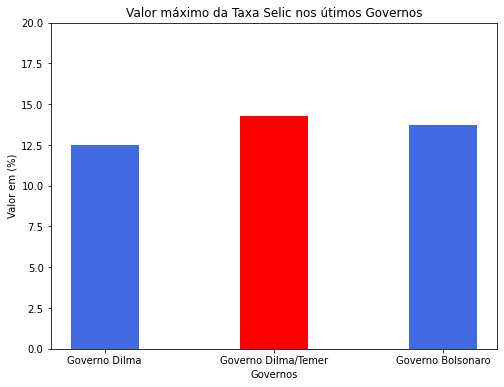

In [ ]:
# Plotando o gráfico

plt.figure(figsize=(8,6))
plt.bar(gov,valor, width=0.40, color=['royalblue','red', 'royalblue'])

plt.ylim(0,20)
plt.title('Valor máximo da Taxa Selic nos útimos Governos')
plt.ylabel('Valor em (%)')
plt.xlabel('Governos')
plt.show()

Nota-se que no período analisado, a taxa Selic teve o valor mais alto durante o Governo Dilma/Temer, quando antingiu o valor de 14.75%.

Enquanto a menor máxima, ocorreu no primeiro mandato da presidente Dilma, quando atingiu 12.50%.


### 2.1.1 Valor mínimo

In [ ]:
# Mínima das taxas
analise_completa.min()


Governo Dilma          7.25
Governo Dilma/Temer    6.50
Governo Bolsonaro      2.00
dtype: float64

Plotando os valores mínimos para o período

In [ ]:
# Passando os valores para variáveis para fazer a representação gráfica

varlor_min = [7.25,  6.50, 2.00]
gov_min    = ['Governo Dilma','Governo Dilma/Temer','Governo Bolsonaro']


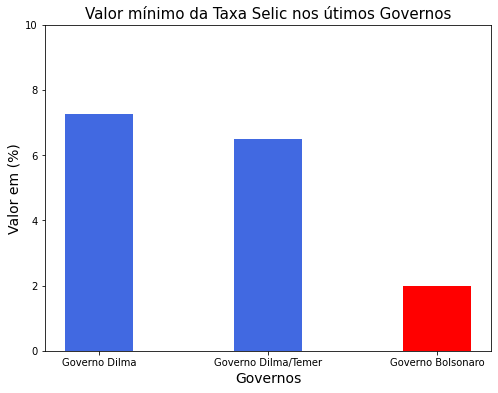

In [ ]:
# Plotando o gráfico

plt.figure(figsize=(8,6))
plt.bar(gov_min,varlor_min, width=0.40, color=['royalblue','royalblue', 'red'])

plt.ylim(0,10)
plt.title('Valor mínimo da Taxa Selic nos útimos Governos', fontsize=(15))
plt.ylabel('Valor em (%)', fontsize=(14))
plt.xlabel('Governos', fontsize=(14))
plt.show()

Quanto aos valores mínimos da taxa Selic para o período analisado, foi observado que o menor valor ocorreu durante o Governo Bolsonaro.

In [ ]:
# Funcção criada necessária para plotar o gráfico a 
def autolabel (valores):
    for i in valores:
        h = i.get_height()
        ax.annotate('{}'.format(h),
                xy = (i.get_x()+i.get_width()/2,h),
                xytext = (0,3),
                textcoords = 'offset points',
                ha = 'center')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


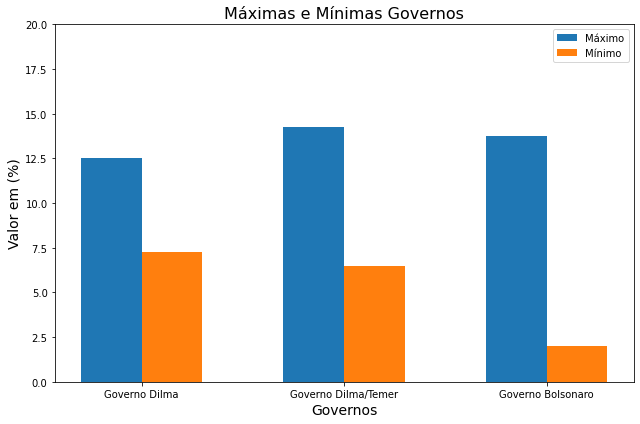

In [ ]:
# passando os valores para lista

govs = ['Governo Dilma','Governo Dilma/Temer','Governo Bolsonaro']
v_max = [12.50, 14.25, 13.75]
v_min = [7.25, 6.50, 2.00]

x = np.arange(len(govs))  # the label locations
largura = 0.30  # the width of the bars

fig, ax = plt.subplots(figsize=(9,6))
max = ax.bar(x - largura/2, v_max, largura, label='Máximo')
min = ax.bar(x + largura/2, v_min, largura, label='Mínimo')

# Nomeando a tabela
ax.set_title('Máximas e Mínimas Governos',fontsize=(16))
ax.set_ylabel('Valor em (%)',fontsize=(14))
ax.set_xlabel('Governos',fontsize=(14))

ax.legend()
ax.set_ylim([0,20])
ax.set_xticks(x,govs)

ax.set_xticks(x)
ax.set_xticklabels(govs)


# autolabel(v_max)
# autolabel(v_min)

fig.tight_layout()

plt.show()

## 2.3 Variação da taxa durante o período 
Plotagem do gráfico com as informções a variação ao longo dos trê períodos.

Text(0, 0.5, 'Valor Taxa Selic')

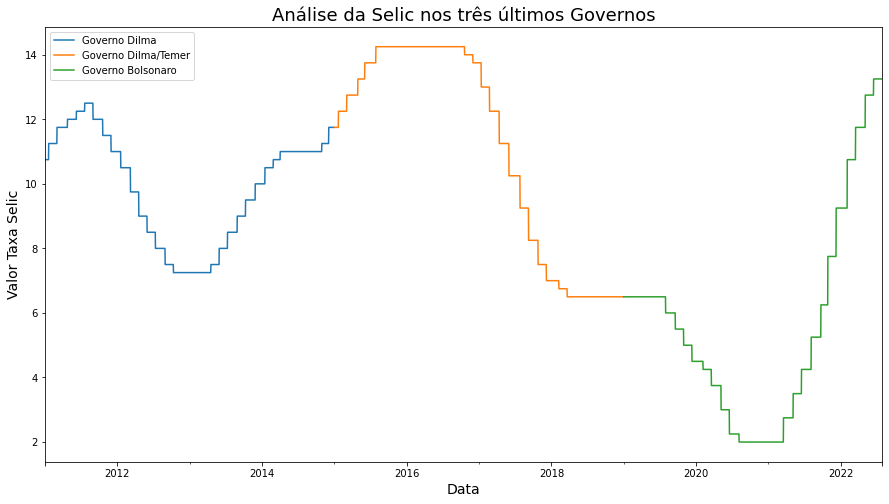

In [ ]:
# Fazendo a plotagem dos dados com os nomes para cada período

analise_completa[['Governo Dilma','Governo Dilma/Temer','Governo Bolsonaro']].plot(figsize=(15,8));

plt.title('Análise da Selic nos três últimos Governos', fontsize= 18)
plt.xlabel('Data',fontsize=(14) )
plt.ylabel('Valor Taxa Selic', fontsize=(14))

# 3. Analisando algumas variáveis estatísticas.

Analisando alguns conceitos básicos de estatísticas que foram utilizados no estudo.

**Média:** Conjunto de dados numéricos obtidos somando os valores de todos os dados e dividindo pelo número de  dados.

**Mediana:** representa o valor central de um conjunto de dados. Para encontrar o valor da mediana é necessário colocar os valores em ordem crescente ou decrescente.

**Moda:** É o valor mais frequente de um conjunto de dados.



**Desvio padrão:** Utilizado para sabermos o quanto os dados apresentados dentro de uma amostra variam.

- Para realizar os calculos através dos métodos, foi utilizado o método round, que é utilizado para arrendondar os valores
para as casas decimais desejadas, neste caso duas.

In [ ]:
# Verificando o valor médio
round(analise_completa.mean(),2)


Governo Dilma           9.91
Governo Dilma/Temer    11.10
Governo Bolsonaro       5.63
dtype: float64

In [ ]:
# Verificando o valor da mediana
round(analise_completa.median(),2)

Governo Dilma          10.50
Governo Dilma/Temer    12.25
Governo Bolsonaro       5.25
dtype: float64

In [ ]:
# Verificando o valor da moda
round(analise_completa.mode(),2)

,Governo Dilma,Governo Dilma/Temer,Governo Bolsonaro
0,11.0,14.25,2.0


In [ ]:
# Verificar o valor da variância

round(analise_completa.var(),2)

Governo Dilma           2.90
Governo Dilma/Temer    10.33
Governo Bolsonaro      10.36
dtype: float64

In [ ]:
# Verificar o valor do desvio padrão

round(analise_completa.std(),2)


Governo Dilma          1.70
Governo Dilma/Temer    3.21
Governo Bolsonaro      3.22
dtype: float64